In [109]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
csv_path= os.path.join("Resources/lc_2016_2017 2.csv")
lending_club_data = pd.read_csv(csv_path, low_memory=False)

lending_club_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           759338 non-null  int64  
 1   member_id                    0 non-null       float64
 2   loan_amnt                    759338 non-null  int64  
 3   funded_amnt                  759338 non-null  int64  
 4   funded_amnt_inv              759338 non-null  float64
 5   term                         759338 non-null  object 
 6   int_rate                     759338 non-null  float64
 7   installment                  759338 non-null  float64
 8   grade                        759338 non-null  object 
 9   sub_grade                    759338 non-null  object 
 10  emp_title                    708368 non-null  object 
 11  emp_length                   708975 non-null  object 
 12  home_ownership               759338 non-null  object 
 13 

In [111]:
# Cleaning uneccesary data (pt.1)

lending_club_data.drop(['id','member_id','desc','zip_code','policy_code','issue_d','initial_list_status','application_type'],axis=1,inplace=True)

lending_club_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 64 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    759338 non-null  int64  
 1   funded_amnt                  759338 non-null  int64  
 2   funded_amnt_inv              759338 non-null  float64
 3   term                         759338 non-null  object 
 4   int_rate                     759338 non-null  float64
 5   installment                  759338 non-null  float64
 6   grade                        759338 non-null  object 
 7   sub_grade                    759338 non-null  object 
 8   emp_title                    708368 non-null  object 
 9   emp_length                   708975 non-null  object 
 10  home_ownership               759338 non-null  object 
 11  annual_inc                   759338 non-null  float64
 12  verification_status          759338 non-null  object 
 13 

In [112]:
# Cleaning uneccesary data (pt.2)

# Converting null values to 0, or None depending on the type of data

lending_club_data[['dti_joint','annual_inc_joint','il_util' , 'mths_since_rcnt_il', 'open_acc_6m', 'open_il_12m', 'open_il_24m', 'total_bal_il', 'inq_last_12m' , 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl' ]] = lending_club_data[['dti_joint','annual_inc_joint','il_util' , 'mths_since_rcnt_il', 'open_acc_6m', 'open_il_12m', 'open_il_24m', 'total_bal_il', 'inq_last_12m' , 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl']].fillna(0)


lending_club_data[['tot_coll_amt','tot_cur_bal','total_rev_hi_lim']] = lending_club_data[['total_rev_hi_lim', 'tot_cur_bal', 'tot_coll_amt']].fillna(0)

lending_club_data.verification_status_joint = lending_club_data.verification_status_joint.fillna('None')

# Converting NaN values to 0 or 1 for the following columns

lending_club_data.mths_since_last_record = lending_club_data.mths_since_last_record.apply(lambda x: 0 if pd.isna(x) else 1) 
lending_club_data.mths_since_last_major_derog = lending_club_data.mths_since_last_major_derog.apply(lambda x: 0 if pd.isna(x) else 1) 
lending_club_data.mths_since_last_delinq = lending_club_data.mths_since_last_delinq.apply(lambda x: 0 if pd.isna(x) else 1)

# Drop the following five columns

lending_club_data.drop(['next_pymnt_d' ,'last_pymnt_d','last_credit_pull_d', 'emp_title','title'],axis=1,inplace=True) 

lending_club_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 59 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    759338 non-null  int64  
 1   funded_amnt                  759338 non-null  int64  
 2   funded_amnt_inv              759338 non-null  float64
 3   term                         759338 non-null  object 
 4   int_rate                     759338 non-null  float64
 5   installment                  759338 non-null  float64
 6   grade                        759338 non-null  object 
 7   sub_grade                    759338 non-null  object 
 8   emp_length                   708975 non-null  object 
 9   home_ownership               759338 non-null  object 
 10  annual_inc                   759338 non-null  float64
 11  verification_status          759338 non-null  object 
 12  loan_status                  759338 non-null  object 
 13 

In [113]:
# Save emp_length (Employment Length) unique values into emp_length_unique DataFrame

emp_length_unique = lending_club_data[['emp_length']].value_counts().to_frame('total')

emp_length_unique


,total
emp_length,
10+ years,257944
2 years,69494
< 1 year,62724
3 years,60843
1 year,50585
5 years,46139
4 years,45573
6 years,32616
8 years,28707


In [114]:
lending_club_data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,759338.000000,759338.000000,759338.000000,759338.000000,759338.000000,7.593380e+05,758983.000000,759338.000000,759337.000000,759338.000000,...,7.593380e+05,759338.000000,759338.000000,759338.000000,759338.000000,759338.000000,759338.000000,759338.000000,759338.000000,759338.000000
mean,14707.775260,14707.738385,14702.529098,13.187041,442.584639,7.996778e+04,18.980803,0.357795,0.538299,0.522341,...,3.571929e+04,60.741616,1.339469,2.847862,5789.830192,59.250400,255.295804,0.968484,1.475109,2.107288
std,9215.456493,9215.456467,9213.003636,5.054311,275.739578,1.634141e+05,13.363398,0.951763,0.838306,0.499501,...,4.324025e+04,32.390009,1.521405,2.622538,5580.483017,20.485302,2370.673461,1.484022,2.681318,2.402572
min,1000.000000,1000.000000,775.000000,5.320000,30.120000,0.000000e+00,-1.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.000000,7500.000000,7500.000000,9.750000,241.700000,4.800000e+04,12.260000,0.000000,0.000000,0.000000,...,9.309000e+03,44.000000,0.000000,1.000000,2368.000000,46.000000,0.000000,0.000000,0.000000,0.000000
50%,12000.000000,12000.000000,12000.000000,12.620000,370.840000,6.700000e+04,18.180000,0.000000,0.000000,1.000000,...,2.360800e+04,69.000000,1.000000,2.000000,4416.000000,60.000000,0.000000,0.000000,0.000000,1.000000
75%,20000.000000,20000.000000,20000.000000,15.590000,590.505000,9.500000e+04,24.780000,0.000000,1.000000,1.000000,...,4.634000e+04,84.000000,2.000000,4.000000,7500.000000,74.000000,0.000000,1.000000,2.000000,3.000000
max,40000.000000,40000.000000,40000.000000,30.990000,1719.830000,1.100000e+08,999.000000,42.000000,5.000000,1.000000,...,1.711009e+06,1000.000000,28.000000,60.000000,776843.000000,211.000000,932461.000000,48.000000,111.000000,49.000000


In [116]:
# Replace '10+ years' with 10 and convert 'emp_length' to numeric
relevant_data['emp_length'] = relevant_data['emp_length'].replace({'10+ years': 10})
relevant_data['emp_length'] = pd.to_numeric(relevant_data['emp_length'], errors='coerce')


/var/folders/q0/gzzd0sss3kd_fyfy36xf2hnc0000gn/T/ipykernel_29073/2755593054.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/q0/gzzd0sss3kd_fyfy36xf2hnc0000gn/T/ipykernel_29073/2755593054.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/var/folders/q0/gzzd0sss3kd_fyfy36xf2hnc0000gn/T/ipykernel_29073/2597926132.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/q0/gzzd0sss3kd_fyfy36xf2hnc0000gn/T/ipykernel_29073/2597926132.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/q0/gzzd0sss3kd_fyfy36xf2hnc0000gn/T/ipykernel_29073/2597926132.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

       emp_length   inq_last_12m  inq_last_6mths     revol_util
count    257760.0  708492.000000   708492.000000  708492.000000
mean         10.0       2.123068        0.538948      50.193246
std           0.0       2.412959        0.839112      24.269197
min          10.0       0.000000        0.000000       0.000000
25%          10.0       0.000000        0.000000      31.800000
50%          10.0       1.000000        0.000000      49.900000
75%          10.0       3.000000        1.000000      68.600000
max          10.0      49.000000        5.000000     173.200000
                emp_length  inq_last_12m  inq_last_6mths  revol_util
emp_length             NaN           NaN             NaN         NaN
inq_last_12m           NaN      1.000000        0.485384   -0.129824
inq_last_6mths         NaN      0.485384        1.000000   -0.105982
revol_util             NaN     -0.129824       -0.105982    1.000000


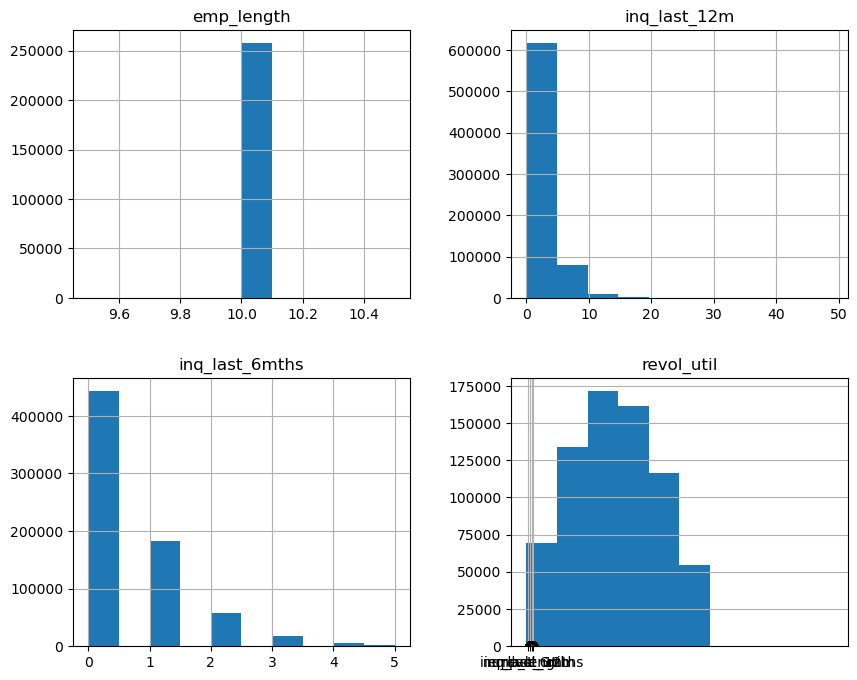

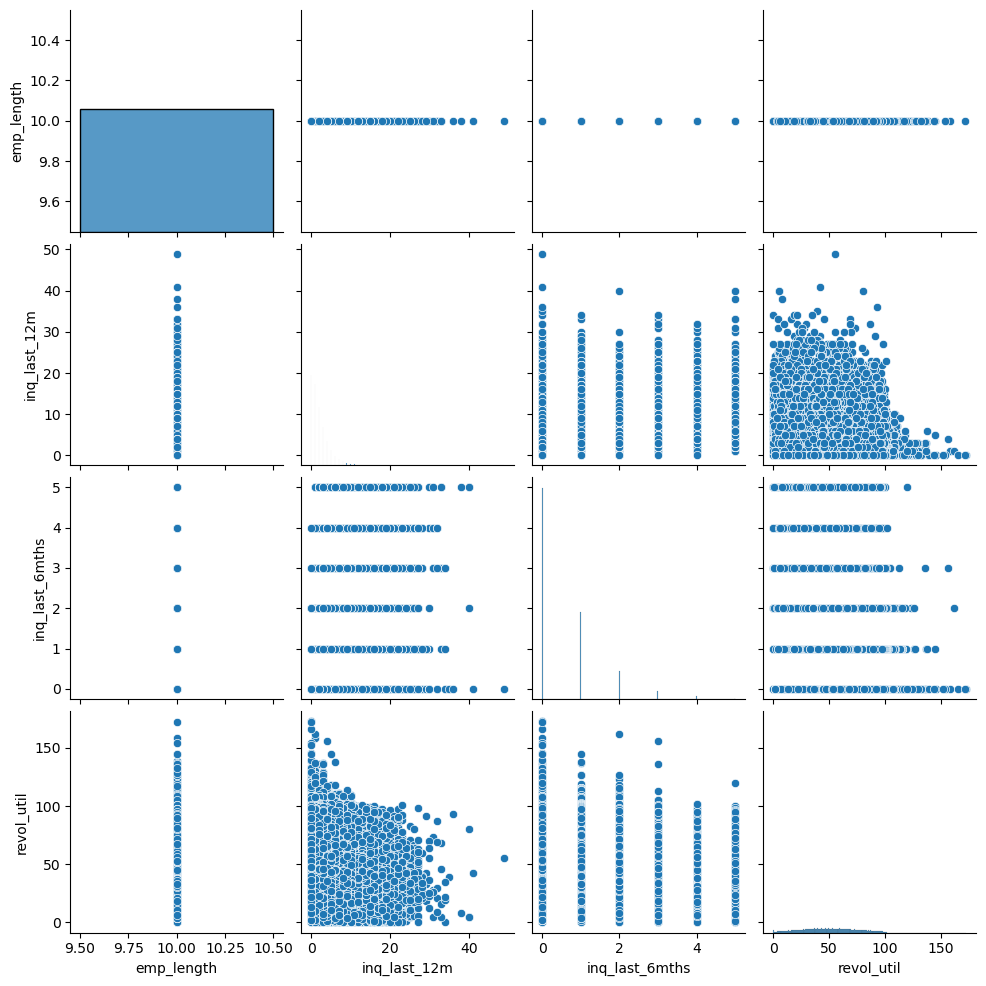

In [119]:
# Select relevant columns
relevant_columns = ['emp_length', 'inq_last_12m', 'inq_last_6mths', 'revol_util']
relevant_data = lending_club_data[relevant_columns]

# Data cleaning (handle missing data, etc.)
relevant_data.dropna(inplace=True)  # Drop rows with missing values
relevant_data.reset_index(drop=True, inplace=True)  # Reset index after dropping rows

# Preprocess 'emp_length' column
relevant_data['emp_length'] = relevant_data['emp_length'].replace({'10+ years': 10})
relevant_data['emp_length'] = pd.to_numeric(relevant_data['emp_length'], errors='coerce')

# Exploratory data analysis
print(relevant_data.describe())  # Summary statistics
relevant_data.hist(figsize=(10, 8))  # Histograms
relevant_data.boxplot(figsize=(10, 8))  # Box plots

# Correlation analysis
correlation_matrix = relevant_data.corr()
print(correlation_matrix)

# Visualization
import seaborn as sns
sns.pairplot(relevant_data)


/var/folders/q0/gzzd0sss3kd_fyfy36xf2hnc0000gn/T/ipykernel_29073/1910522022.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/q0/gzzd0sss3kd_fyfy36xf2hnc0000gn/T/ipykernel_29073/1910522022.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



       emp_length   inq_last_12m  inq_last_6mths     revol_util
count         0.0  257760.000000   257760.000000  257760.000000
mean          NaN       2.089067        0.542776      51.356541
std           NaN       2.364929        0.843893      24.304461
min           NaN       0.000000        0.000000       0.000000
25%           NaN       0.000000        0.000000      32.900000
50%           NaN       1.000000        0.000000      51.400000
75%           NaN       3.000000        1.000000      70.000000
max           NaN      49.000000        5.000000     172.000000
                emp_length  inq_last_12m  inq_last_6mths  revol_util
emp_length             NaN           NaN             NaN         NaN
inq_last_12m           NaN      1.000000        0.492767   -0.128851
inq_last_6mths         NaN      0.492767        1.000000   -0.100154
revol_util             NaN     -0.128851       -0.100154    1.000000


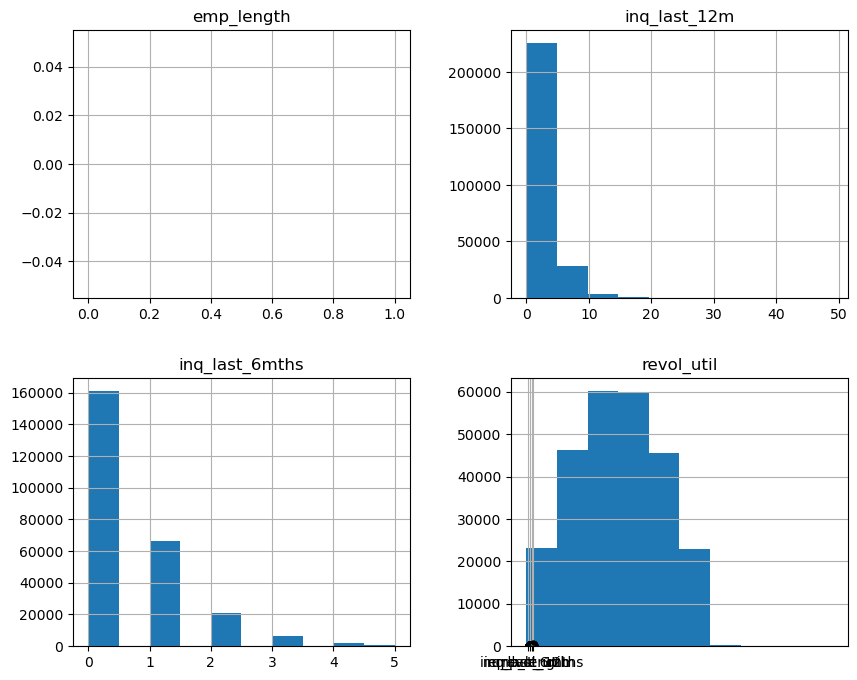

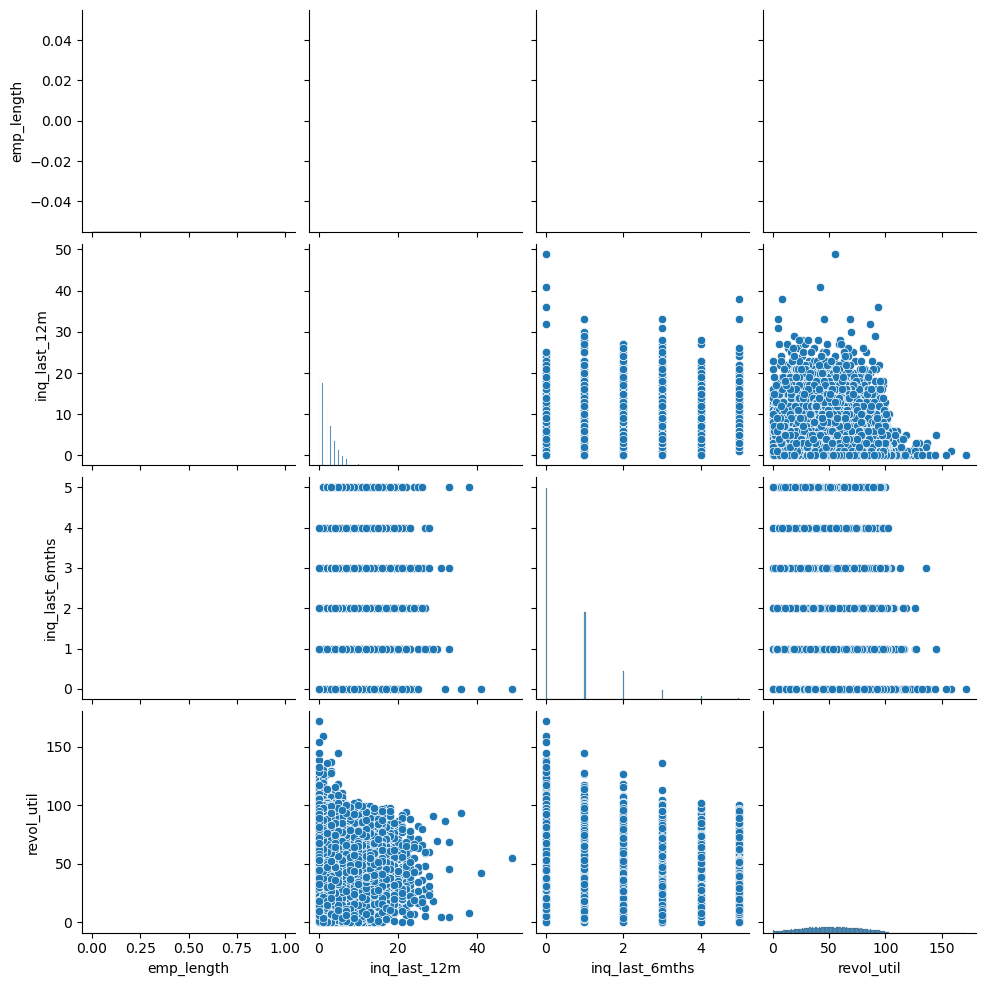

In [120]:
# Data cleaning (handle missing data, etc.)
relevant_data.dropna(inplace=True)  # Drop rows with missing values
relevant_data.reset_index(drop=True, inplace=True)  # Reset index after dropping rows

# Convert 'emp_length' column to numeric
emp_length_map = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}
relevant_data['emp_length'] = relevant_data['emp_length'].map(emp_length_map)

# Exploratory data analysis
print(relevant_data.describe())  # Summary statistics
relevant_data.hist(figsize=(10, 8))  # Histograms
relevant_data.boxplot(figsize=(10, 8))  # Box plots

# Correlation analysis
correlation_matrix = relevant_data.corr()
print(correlation_matrix)

# Visualization
import seaborn as sns
sns.pairplot(relevant_data)


In [108]:
# Replace '10+ years' with 10 and convert 'emp_length' to numeric
relevant_data['emp_length'] = relevant_data['emp_length'].replace({'10+ years': 10})
relevant_data['emp_length'] = pd.to_numeric(relevant_data['emp_length'], errors='coerce')

# Calculate the correlation matrix
correlation_matrix = relevant_data.corr()

# Plot the correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)


KeyError: 'emp_length'

/var/folders/q0/gzzd0sss3kd_fyfy36xf2hnc0000gn/T/ipykernel_29073/1031670118.py:2: DtypeWarning: Columns (18,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Resources/lc_2016_2017 2.csv")  # Replace 'your_dataset.csv' with the actual file path


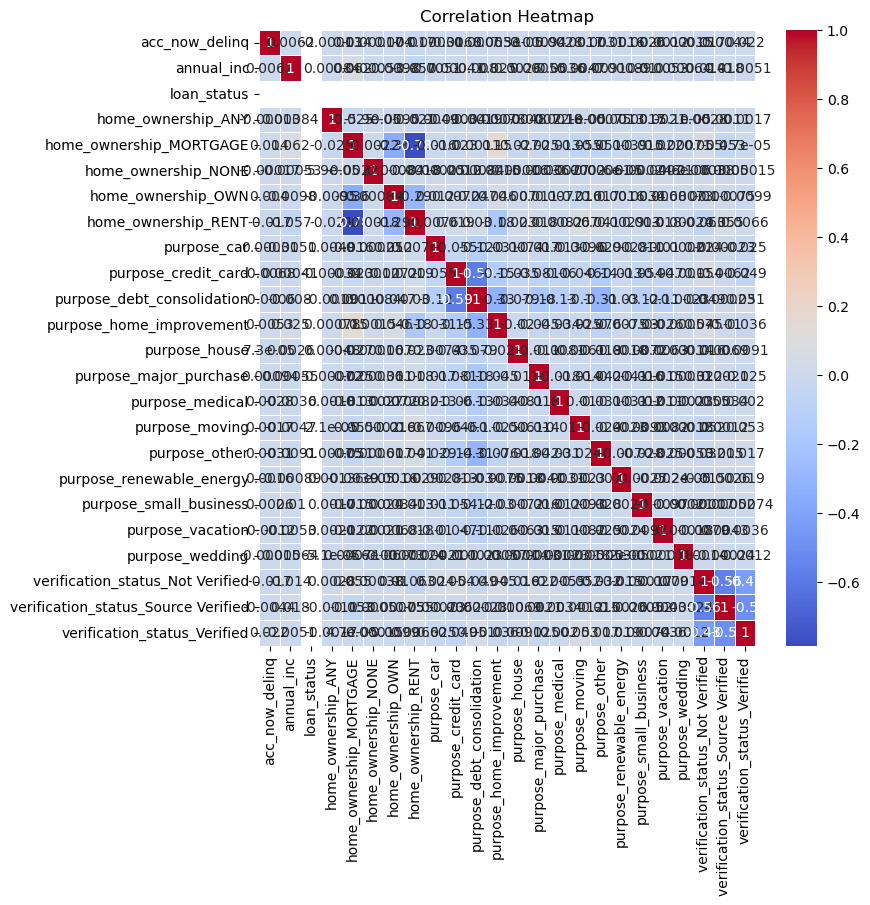

In [104]:

# Load the data
df = pd.read_csv("Resources/lc_2016_2017 2.csv")  # Replace 'your_dataset.csv' with the actual file path

# Preprocess the data
# Drop non-numeric columns or encode them into numeric format
relevant_data = df[['acc_now_delinq', 'annual_inc', 'home_ownership', 'purpose', 'verification_status', 'loan_status']]
relevant_data = pd.get_dummies(relevant_data, columns=['home_ownership', 'purpose', 'verification_status'])
relevant_data['loan_status'] = relevant_data['loan_status'].apply(lambda x: 1 if x == 'Delinquent' else 0)  # Assuming 'Delinquent' indicates delinquency

# Calculate the correlation matrix
correlation_matrix = relevant_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

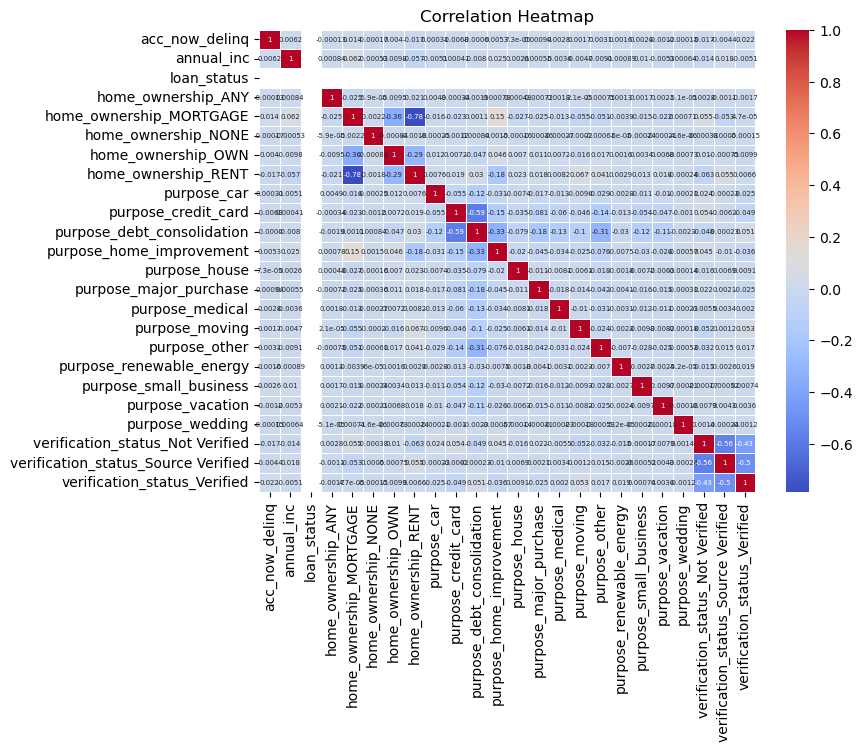

In [105]:
# Plot the correlation heatmap with smaller font size
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 5})  # Adjust the annot_kws font size
plt.title('Correlation Heatmap')
plt.show()


In [107]:
# Filter the relevant columns
map_data = lending_club_data[['addr_state', 'acc_now_delinq']]

# Aggregate the data by state
state_delinq = map_data.groupby('addr_state').sum().reset_index()

# Create an interactive map graph
fig = px.choropleth(locations=state_delinq['addr_state'],
                    locationmode="USA-states",
                    color=state_delinq['acc_now_delinq'],
                    scope="usa",
                    color_continuous_scale="Viridis",
                    title="Acc Now Delinq Distribution by State")
fig.update_layout(coloraxis_colorbar=dict(title='Acc Now Delinq'))
fig.show()
